Reference: 

https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html#importing-your-documents

https://radimrehurek.com/gensim/wiki.html#latent-dirichlet-allocation

http://intelligentonlinetools.com/blog/2017/01/22/data-visualization-visualizing-an-lda-model-using-python/

https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [12]:
import numpy as np
import lda
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import matplotlib.pyplot as plt 
import matplotlib

In [13]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')
en_stop += ['wine','s']

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [14]:
wine = pd.read_csv('https://raw.githubusercontent.com/zy2292/Wine-Master/master/Data/wine_data_cleaned.csv')
wine_drp = wine['description'].tolist()
feature_names = ['accent', 'acid', 'add', 'age', 'alcohol', 'almond', 'alongsid', 'appl', 'apricot', 'aroma', 'aromat', 'attract', 'bake', 'balanc', 'barrel', 'beauti', 'berri', 'best', 'big', 'bit', 'bitter', 'black', 'blackberri', 'blend', 'blueberri', 'bodi', 'bottl', 'bright', 'bring', 'cabernet', 'candi', 'cassi', 'charact', 'chardonnay', 'cherri', 'chocol', 'cinnamon', 'citrus', 'clean', 'close', 'clove', 'coffe', 'cola', 'color', 'come', 'complex', 'concentr', 'core', 'creami', 'crisp', 'crush', 'currant', 'dark', 'delic', 'delici', 'deliv', 'dens', 'domin', 'dri', 'drink', 'earth', 'earthi', 'easi', 'edg', 'eleg', 'end', 'enjoy', 'feel', 'fine', 'finish', 'firm', 'flavor', 'floral', 'flower', 'follow', 'fresh', 'fruit', 'fruiti', 'generous', 'good', 'grape', 'grapefruit', 'great', 'green', 'herb', 'herbal', 'high', 'hint', 'honey', 'impress', 'intens', 'juici', 'just', 'layer', 'lead', 'leather', 'lemon', 'licoric', 'light', 'like', 'lime', 'linger', 'littl', 'live', 'long', 'make', 'matur', 'medium', 'melon', 'merlot', 'miner', 'mix', 'mouth', 'mouthfeel', 'need', 'new', 'nice', 'noir', 'nose', 'note', 'oak', 'offer', 'open', 'orang', 'palat', 'peach', 'pear', 'pepper', 'perfum', 'pineappl', 'pinot', 'plenti', 'plum', 'power', 'produc', 'raspberri', 'readi', 'red', 'refresh', 'rich', 'ripe', 'round', 'sauvignon', 'savori', 'scent', 'simpl', 'skin', 'slight', 'smoke', 'smoki', 'smooth', 'soft', 'solid', 'spice', 'spici', 'stone', 'strawberri', 'strong', 'structur', 'style', 'suggest', 'sweet', 'syrah', 'tangi', 'tannic', 'tannin', 'tart', 'tast', 'textur', 'tight', 'time', 'toast', 'toasti', 'tobacco', 'tone', 'touch', 'tropic', 'vanilla', 'veri', 'vineyard', 'vintag', 'weight', 'white', 'wild', 'wine', 'wood', 'year', 'yellow', 'young']

In [15]:
# list for tokenized documents in loop
texts = []

# loop through document list
for i in wine_drp:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if i in feature_names]
    #stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary)#, passes=20)

In [16]:
topicWordProbMat = ldamodel.print_topics(10)
weight = []
words = []
for line in topicWordProbMat:
    for i in range(0,10):
            weight.append(line[1].split("+")[i].split("*")[0])
            words.append(line[1].split("+")[i].split("*")[1])
weight2 = [float(i) for i in weight]

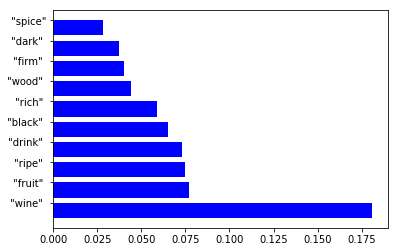

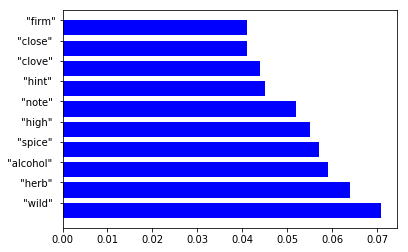

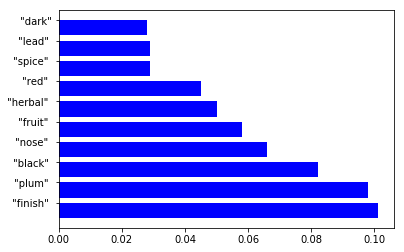

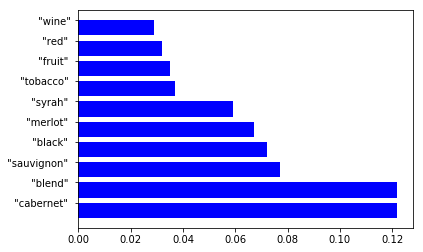

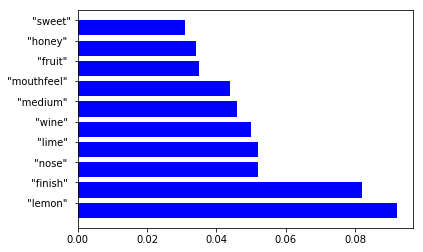

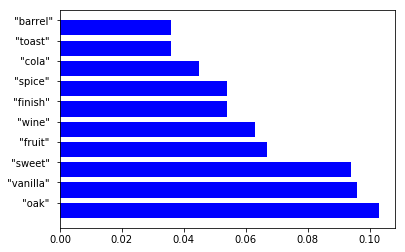

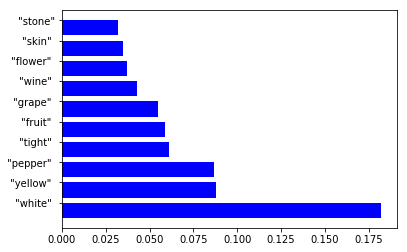

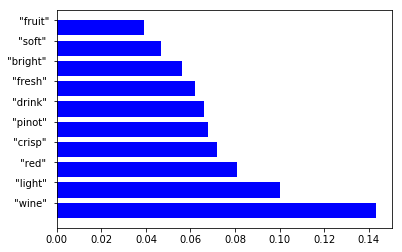

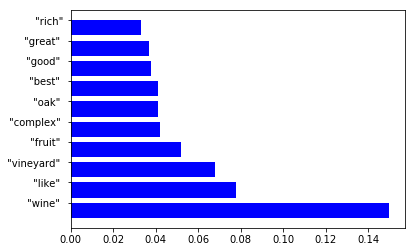

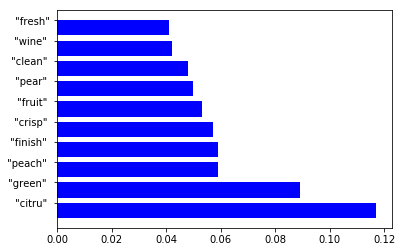

In [17]:
for i in range(10):
    fig, ax = plt.subplots()    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(weight[10*i:10*i+10]))  # the x locations for the groups
    ax.barh(ind, weight2[10*i:10*i+10], width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(words[10*i:10*i+10], minor=False)
    plt.show()

In [18]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

/Users/Zihan/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      16.484284        1       1 -0.169184  0.109247
2      12.673277        1       2 -0.079297 -0.167450
7      10.903997        1       3  0.059469  0.178264
5      10.262832        1       4 -0.059864  0.083435
9       9.786257        1       5  0.271902 -0.049223
8       9.286427        1       6 -0.094197  0.253361
4       9.237003        1       7  0.194440  0.023537
3       9.168463        1       8 -0.201788 -0.090314
1       6.602190        1       9 -0.135414 -0.248943
6       5.595269        1      10  0.213934 -0.091914, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
27    Default  12254.000000       white  12254.000000  30.0000  30.0000
36    Default   9831.000000    cabernet   9831.000000  29.0000  29.0000
0     Default  10601.000000       citru  10601.000000  28.0000  28.0000
55    Default  11606.000000       blend  11606.000000  27.0000  27.0000
41    Default  25824.000000       black  25824.000000  26.0000  26.0000
23    Default  13240.000000        plum  13240.000000  25.0000  25.0000
7     Default  71071.000000        wine  71071.000000  24.0000  24.0000
73    Default  11326.000000       light  11326.000000  23.0000  23.0000
13    Default  31325.000000      finish  31325.000000  22.0000  22.0000
8     Default  11814.000000       crisp  11814.000000  21.0000  21.0000
44    Default   9770.000000     vanilla   9770.000000  20.0000  20.0000
42    Default  16452.000000         oak  16452.000000  19.0000  19.0000
78    Default  12261.000000       sweet  12261.000000  18.0000  18.0000
9     Default   8832.000000       green   8832.000000  17.0000  17.0000
15    Default   8525.000000       lemon   8525.000000  16.0000  16.0000
25    Default   9675.000000      pepper   9675.000000  15.0000  15.0000
60    Default   6481.000000       pinot   6481.000000  14.0000  14.0000
18    Default   7510.000000        like   7510.000000  13.0000  13.0000
56    Default   7191.000000   sauvignon   7191.000000  12.0000  12.0000
4     Default  18732.000000         red  18732.000000  11.0000  11.0000
53    Default  14602.000000        nose  14602.000000  10.0000  10.0000
28    Default  17222.000000       spice  17222.000000   9.0000   9.0000
38    Default   5408.000000      merlot   5408.000000   8.0000   8.0000
66    Default   5781.000000    vineyard   5781.000000   7.0000   7.0000
30    Default   7615.000000       peach   7615.000000   6.0000   6.0000
70    Default   4317.000000      yellow   4317.000000   5.0000   5.0000
3     Default   8791.000000        firm   8791.000000   4.0000   4.0000
17    Default   5587.000000      herbal   5587.000000   3.0000   3.0000
90    Default   4736.000000       syrah   4736.000000   2.0000   2.0000
54    Default   6322.000000        wood   6322.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
27    Topic10   8962.293036       white  12254.909936   2.5703  -1.7014
40    Topic10   3016.861800       tight   4908.430858   2.3965  -2.7902
61    Topic10   1828.417468      flower   3005.208288   2.3864  -3.2910
83    Topic10   1456.019742      almond   2784.570975   2.2349  -3.5187
25    Topic10   4279.304652      pepper   9675.065677   2.0675  -2.4406
69    Topic10   1594.636134       stone   3816.655592   2.0105  -3.4278
134   Topic10      0.743890       miner      2.826399   1.5484 -11.0981
111   Topic10    325.987412       enjoy   1576.122003   1.3074  -5.0153
68    Topic10    817.326355        lead   4405.449580   1.1987  -4.0962
58    Topic10    858.556155        hint   5525.118403   1.0214  -4.0469
24    Topic10   1452.816022      bright  10163.185856   0.9380  -3.5209
86    Topic10    516.470050  grapefruit   3827.968572   0.8802  -4.5552
85    Topic10    784.449654        note   5833.399759   0.8769  -4.13

In [46]:
def format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=wine_drp):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=wine_drp)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.6083,"citru, green, peach, finish, crisp, fruit, pea...","Aromas include tropical fruit, broom, brimston..."
1,1,0.0,0.8500,"wine, fruit, ripe, drink, black, rich, wood, f...","This is ripe and fruity, a wine that is smooth..."
2,2,9.0,0.8500,"citru, green, peach, finish, crisp, fruit, pea...","Tart and snappy, the flavors of lime flesh and..."
3,3,4.0,0.8200,"lemon, finish, nose, lime, wine, medium, mouth...","Pineapple rind, lemon pith and orange blossom ..."
4,4,8.0,0.6109,"wine, like, vineyard, fruit, complex, oak, bes...","Much like the regular bottling from 2012, this..."
5,5,2.0,0.9000,"finish, plum, black, nose, fruit, herbal, red,...",Blackberry and raspberry aromas show a typical...
6,6,7.0,0.4267,"wine, light, red, crisp, pinot, drink, fresh, ...","Here's a bright, informal red that opens with ..."
7,7,0.0,0.7750,"wine, fruit, ripe, drink, black, rich, wood, f...",This dry and restrained wine offers spice in p...
8,8,9.0,0.5887,"citru, green, peach, finish, crisp, fruit, pea...",Savory dried thyme notes accent sunnier flavor...
9,9,7.0,0.6355,"wine, light, red, crisp, pinot, drink, fresh, ...",This has great depth of flavor with its fresh ...


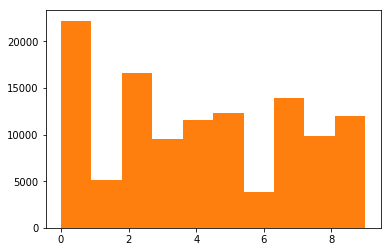

In [49]:
plt.hist(df_dominant_topic['Dominant_Topic'])
plt.show()

In [82]:
df_dominant_topic.iloc[index1].head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
1,1,0.0,0.8500,"wine, fruit, ripe, drink, black, rich, wood, f...","This is ripe and fruity, a wine that is smooth..."
7,7,0.0,0.7750,"wine, fruit, ripe, drink, black, rich, wood, f...",This dry and restrained wine offers spice in p...
9,9,7.0,0.6355,"wine, light, red, crisp, pinot, drink, fresh, ...",This has great depth of flavor with its fresh ...
11,11,6.0,0.3870,"white, yellow, pepper, tight, fruit, grape, wi...","This is a dry wine, very spicy, with a tight, ..."
30,30,7.0,0.8714,"wine, light, red, crisp, pinot, drink, fresh, ...",Red cherry fruit comes laced with light tannin...


In [52]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,year,unique_name,index
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0,Nicosia 2013 Vulkà Bianco (Etna) White Blend,0.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,Quinta dos Avidagos 2011 Avidagos Red (Douro) ...,1.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,Rainstorm 2013 Pinot Gris (Willamette Valley) ...,2.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,St. Julian 2013 Reserve Late Harvest Riesling ...,3.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,4.0


In [51]:
len(df_dominant_topic)

116759

In [68]:
TN = wine['taster_name'].unique()
#TN.remove(nan)
#np.delete(TN, [0])
TN

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt', 'Alexander Peartree',
       'Michael Schachner', 'Anna Lee C. Iijima', 'Virginie Boone',
       'Matt Kettmann', nan, 'Sean P. Sullivan', 'Jim Gordon',
       'Joe Czerwinski', 'Anne Krebiehl\xa0MW', 'Lauren Buzzeo',
       'Susan Kostrzewa', 'Roger VossPaul Gregutt',
       'Virginie BooneJim Gordon', 'Carrie Dykes', 'Fiona Adams',
       'Roger VossAnne Krebiehl\xa0MW', 'Roger VossJoe Czerwinski',
       'Roger VossAnne Krebiehl\xa0MWJoe Czerwinski',
       'Virginie BooneChristina Pickard', 'Anne Krebiehl\xa0MWRoger Voss',
       'Christina PickardJoe Czerwinski', 'Sean P. SullivanPaul Gregutt',
       'Jim GordonVirginie Boone', 'Paul GreguttSean P. Sullivan',
       'Susan KostrzewaAnna Lee C. Iijima', 'Christina Pickard',
       'Anna Lee C. IijimaCarrie Dykes'], dtype=object)

In [74]:
wine['number'] = range(0, 116759)

In [78]:
index1 = wine.loc[wine['taster_name'] == TN[1]]['number']

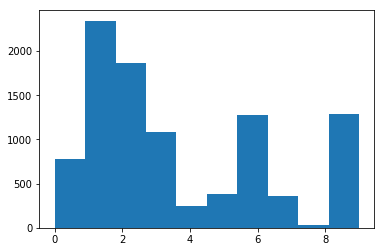

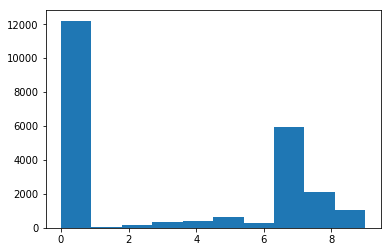

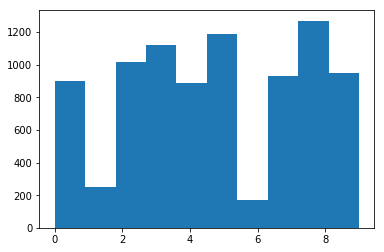

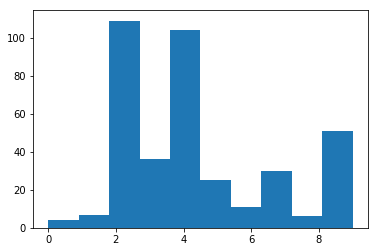

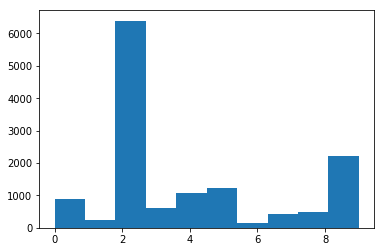

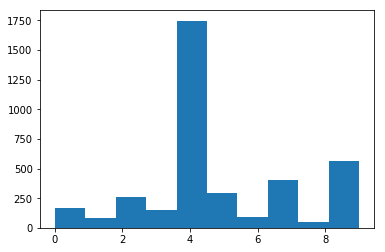

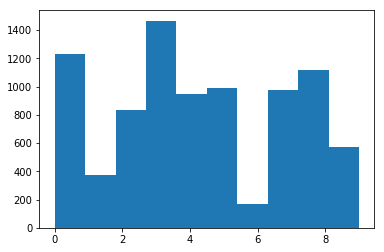

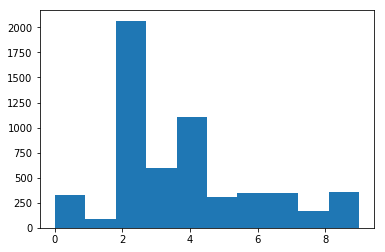

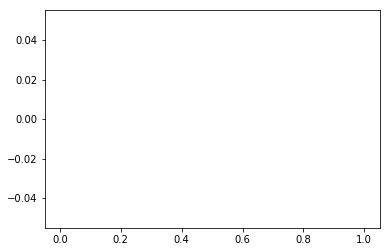

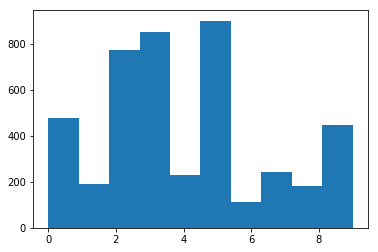

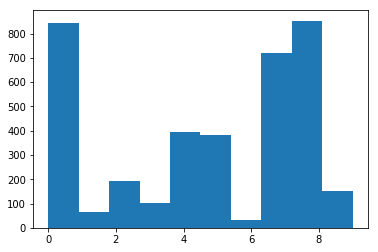

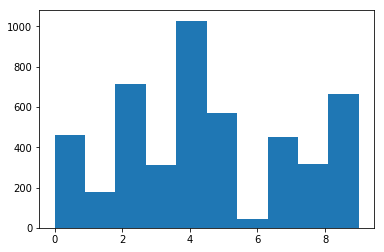

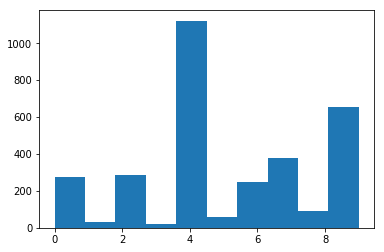

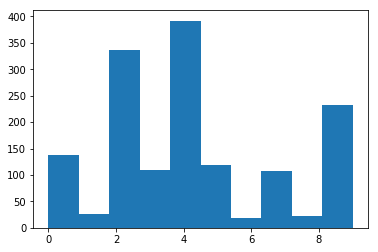

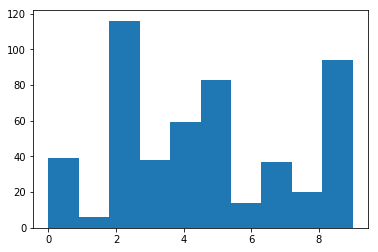

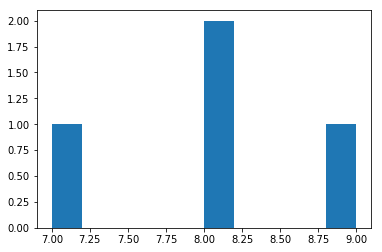

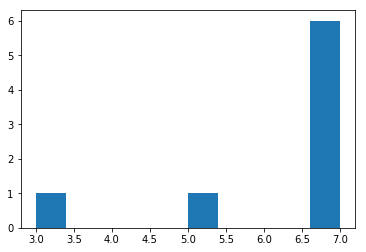

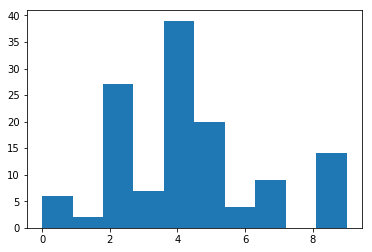

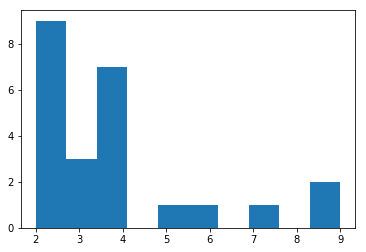

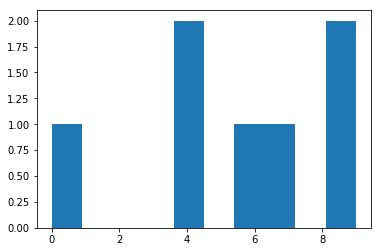

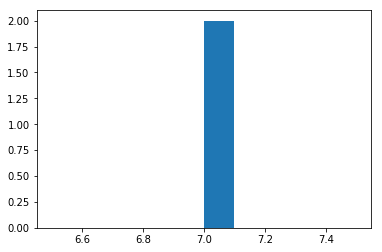

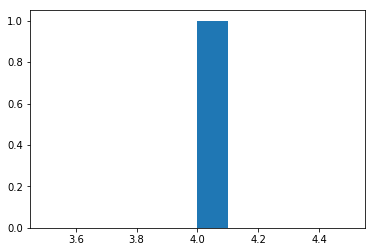

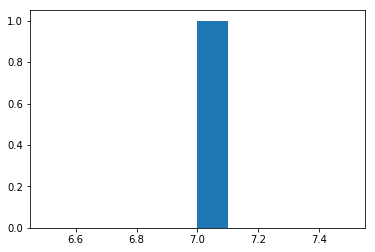

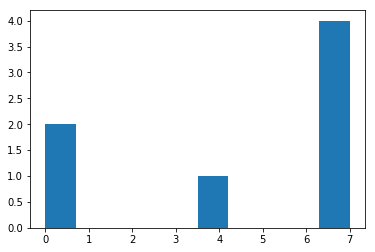

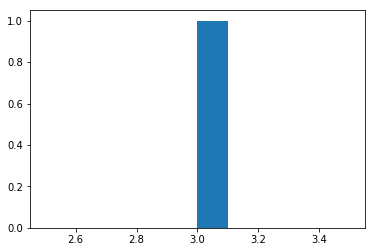

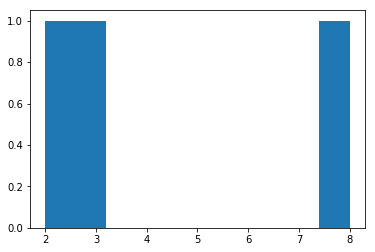

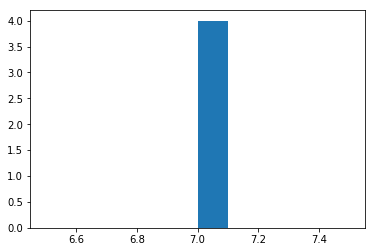

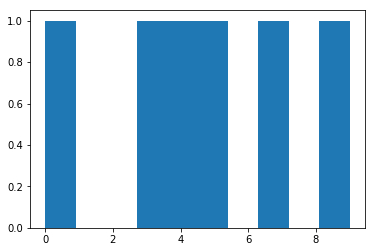

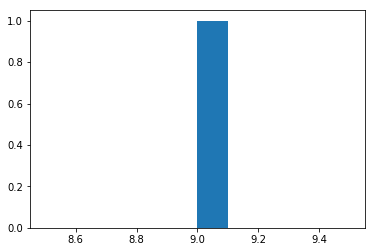

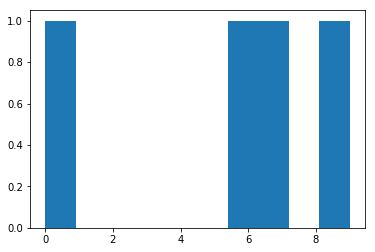

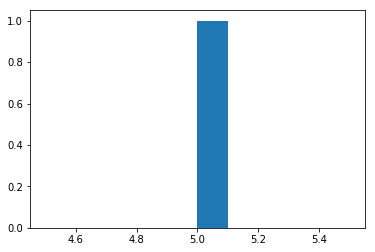

In [83]:
for name in TN:
    wine_TN = wine.loc[wine['taster_name'] == name]
    index = wine_TN['number']
    topic_number = df_dominant_topic.iloc[index]['Dominant_Topic']
    #sum += wine_TN.shape[0]
    #print(name)
    #print(wine_TN.shape)
    plt.hist(topic_number)
    plt.show()